# The Problem



## Initial Energy Terms

Here we initialize the energy terms, defined by the total energy equation:

![alt text](https://image.slidesharecdn.com/molecularmodellingforinsilicodrugdiscovery-141212161303-conversion-gate01/95/molecular-modelling-for-in-silico-drug-discovery-17-638.jpg?cb=1454359395)

In our model, we introduce some other energy terms to this energy equation, as shown in the next code block:

In [9]:
import numpy as np
import random as random

# returns a vector that has all the energy terms 
def energy_terms():
    # initial values of the energy terms
    bond = 49.7829
    angle = 138.4463
    dihed = 217.8041
    nb = 39.1752
    eel = 695.8385
    vdw = -83.5197
    el = -1162.1836
    egb = -162.3717
    
    return np.array([bond, angle, dihed, nb, eel, vdw, el, egb])

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html
    
print(sum(energy_terms()))

-267.028


## Consider the weights in the equation

In [3]:
# initialize all the weights to 1
wb = 1
wa = 1
wd = 1
wn = 1
wee = 1
wv = 1
wel = 1
weg = 1

weights = [wb,wa,wd,wn,wee,wv,wel,weg]

# returns a vector describing all of the weights
def weights():
    return [wb,wa,wd,wn,wee,wv,wel,weg]

print(sum(weights()))

8


The sum of these weights is equal to 8. We want to keep this sum total weight equal to 8 as we perform our sensitivity analysis, while redistributing the individual weights.

In [4]:
def total_energy():    
    return wb*bond + wa*angle + wd*dihed + wn*nb + wee*eel + wv*vdw + wel*el + weg*egb

print(total_energy())

NameError: name 'bond' is not defined

# Energy Minimization via Sensitivity Analysis

The objective here is to minimize the total energy via the process of sensitivity analysis. In other words, we will vary the weights of each of the energy terms, while keeping the sum total weights constant, so that we return the lowest value of total energy.

Here we use the __one-at-a-time__ technique known in the field of sensitivty analysis, to vary the weights individually, one at a time.

## Genetic Algorithm

Instead of using the one-at-a-time method, I have chosen to try a different method. 

Here we apply the metaheuristic, a genetic algorithm, to solve the energy minimization problem by redistributing the weights such that the total energy equation is minimized.

(scroll past this code block)

In [11]:
# random initialization of an attempt at the solution, an "individual"
individual = []

# total amount of weight left to be redistributed 
total_weight_left = float(len(weights()))
print(total_weight_left)

# distribute random weights to an individual, while keeping total weight constant
for weight in (range(len(weights())-1)):    
    distribute = random.uniform(0,1) * total_weight_left
    total_weight_left -= distribute
    new_weight = distribute
    individual.append(new_weight)
    
# add what's left to be distributed, as the final weight 
individual.append(total_weight_left)

# total weight is unchanged 
# weights have been randomly distributed
print(individual)
print(sum(individual))

"""initialize energy terms"""

bond = 49.7829
angle = 138.4463
dihed = 217.8041
nb = 39.1752
eel = 695.8385
vdw = -83.5197
el = -1162.1836
egb = -162.3717

energy_terms = np.array([[bond], [angle], [dihed], [nb], [eel], [vdw], [el], [egb]])

"""matrix multiplication to computer total_energy"""

np.array(individual)

# calculate dot product of the arrays
total_energy = np.dot(individual, energy_terms)

print(total_energy)

print_weights_of(individual)

# repeat this, but with weights all equal to 1 just to verfiy that it's working
print(np.dot(np.ones(len(energy_terms)), energy_terms))

8.0
[7.589000093651795, 0.3014229245316537, 0.004902410655775529, 0.06961786415733297, 0.010643788012007441, 0.015876682744726346, 0.008409411263009673, 0.0001268249836991666]
8.0
[ 419.61484935]

Here are the weights for the following energy terms...

 bond = 7.589000093651795
 angle = 0.3014229245316537
 dihed = 0.004902410655775529
 nb = 0.06961786415733297
 eel = 0.010643788012007441
 vdw = 0.015876682744726346
 el = 0.008409411263009673
 egb = 0.0001268249836991666

[-267.028]


### Potential Problem

It is worth noting that this method of distributing weights will favour the generated weights at the start of the for loop. The weights towards the end of the list will be closer to zero, and the weights at the start of the individual's list of weights will be closer to 8, as it has a greater chance at getting the total weight of 8, as there is more total weight left to choose from.

To address this problem, I shuffle the weights in the next section, but perhaps more can be done to improve this.

(scroll past this one as well)

In [10]:
population = []

# random initialization of an attempt at the solution, an "individual"
individual = []

# total amount of weight left to be redistributed 
total_weight_left = float(len(weights()))
# print(total_weight_left)

# distribute random weights to an individual, while keeping total weight constant
for weight in (range(len(weights())-1)):    
    distribute = random.uniform(0,1) * total_weight_left
    total_weight_left -= distribute
    new_weight = distribute
    individual.append(new_weight)
    
# add what's left to be distributed, as the final weight 
individual.append(total_weight_left)

# total weight is unchanged 
# weights have been randomly distributed

# randomly shuffle the weights in the list
random.shuffle(individual)
print_weights_of(individual)

# print(individual)
# print(sum(individual))

"""initialize energy terms"""

bond = 49.7829
angle = 138.4463
dihed = 217.8041
nb = 39.1752
eel = 695.8385
vdw = -83.5197
el = -1162.1836
egb = -162.3717

energy_terms = np.array([[bond], [angle], [dihed], [nb], [eel], [vdw], [el], [egb]])

"""matrix multiplication to computer total_energy"""

np.array(individual)

# calculate dot product of the arrays
total_energy = np.dot(individual, energy_terms)

# original weights of 1
original_energy = np.dot(np.ones(len(energy_terms)), energy_terms)

# print sum of all the weights in this attempt at the solution, notice it is constant
print(sum(individual))
print(individual)
print(original_energy)
print(total_energy)
# the objective is to return the most negative total_energy


Here are the weights for the following energy terms...

 bond = 0.006872565808458783
 angle = 0.9907197799636195
 dihed = 0.024890202468587443
 nb = 0.0030649403217731935
 eel = 0.023560703194422633
 vdw = 6.788108894586954
 el = 0.14665102905216107
 egb = 0.016131884604023376

8.0
[0.006872565808458783, 0.9907197799636195, 0.024890202468587443, 0.0030649403217731935, 0.023560703194422633, 6.788108894586954, 0.14665102905216107, 0.016131884604023376]
[-267.028]
[-580.55627456]


## Incomplete, but working Genetic Algorithm

This code can be made much more efficient by using the subroutines involved in a genetic algorithm:
* mutation
* crossover
* tournament selection

However, this piece of code __does work__ as a kind of heuristic to this problem. If you change the value of *end* to a higher value, you will eventually reach the solution with enough accuracy.

In [11]:
# original weights of 1
original_energy = np.dot(np.ones(len(energy_terms)), energy_terms)
last_energy = original_energy
end = 100

for a in range(end):

    population = []

    # random initialization of an attempt at the solution, an "individual"
    individual = []

    # total amount of weight left to be redistributed 
    total_weight_left = float(len(weights()))
    # print(total_weight_left)

    # distribute random weights to an individual, while keeping total weight constant
    for weight in (range(len(weights())-1)):    
        distribute = random.uniform(0,1) * total_weight_left
        total_weight_left -= distribute
        new_weight = distribute
        individual.append(new_weight)

    # add what's left to be distributed, as the final weight 
    individual.append(total_weight_left)

    # total weight is unchanged 
    # weights have been randomly distributed

    # randomly shuffle the weights in the list
    random.shuffle(individual)

    """initialize energy terms"""

    bond = 49.7829
    angle = 138.4463
    dihed = 217.8041
    nb = 39.1752
    eel = 695.8385
    vdw = -83.5197
    el = -1162.1836
    egb = -162.3717

    energy_terms = np.array([[bond], [angle], [dihed], [nb], [eel], [vdw], [el], [egb]])

    """matrix multiplication to computer total_energy"""

    np.array(individual)

    # calculate dot product of the arrays
    total_energy = np.dot(individual, energy_terms)

    if total_energy < last_energy:
        last_energy = total_energy
        best_weights = individual
    
print(last_energy)
print(best_weights)
print_weights_of(best_weights)
print('This results in the following energy', last_energy)

[-7481.06557507]
[0.0028839339995446757, 0.09948313278575398, 1.1847296405481895, 0.004022611001644704, 0.0142208696327057, 0.0017597349582597417, 6.677445697153503, 0.015454379920399122]

Here are the weights for the following energy terms...

 bond = 0.0028839339995446757
 angle = 0.09948313278575398
 dihed = 1.1847296405481895
 nb = 0.004022611001644704
 eel = 0.0142208696327057
 vdw = 0.0017597349582597417
 el = 6.677445697153503
 egb = 0.015454379920399122

This results in the following energy [-7481.06557507]


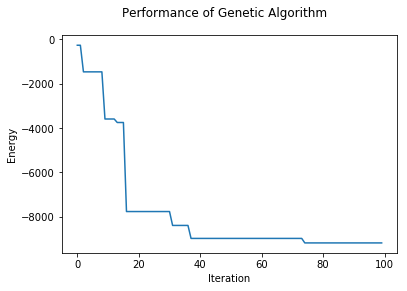


Here are the weights for the following energy terms...

 bond = 4.077900978145287e-05
 angle = 0.0018645830562325503
 dihed = 0.0008055351117342956
 nb = 0.00013448242605063062
 eel = 0.055519350717020716
 vdw = 0.005983721303723033
 el = 7.935541628792299
 egb = 0.00010991958315847056

This results in the following energy [-9184.00055087]


In [48]:
import matplotlib.pyplot as plt
import numpy as np

# original weights of 1
original_energy = np.dot(np.ones(len(energy_terms)), energy_terms)
last_energy = original_energy
end = 100

list_total_energy = []

for a in range(end):

    population = []

    # random initialization of an attempt at the solution, an "individual"
    individual = []

    # total amount of weight left to be redistributed 
    total_weight_left = float(len(weights()))
    # print(total_weight_left)

    # distribute random weights to an individual, while keeping total weight constant
    for weight in (range(len(weights())-1)):    
        distribute = random.uniform(0,1) * total_weight_left
        total_weight_left -= distribute
        new_weight = distribute
        individual.append(new_weight)

    # add what's left to be distributed, as the final weight 
    individual.append(total_weight_left)

    # total weight is unchanged 
    # weights have been randomly distributed

    # randomly shuffle the weights in the list
    random.shuffle(individual)

    """initialize energy terms"""

    bond = 49.7829
    angle = 138.4463
    dihed = 217.8041
    nb = 39.1752
    eel = 695.8385
    vdw = -83.5197
    el = -1162.1836
    egb = -162.3717

    energy_terms = np.array([[bond], [angle], [dihed], [nb], [eel], [vdw], [el], [egb]])

    """matrix multiplication to computer total_energy"""

    np.array(individual)

    # calculate dot product of the arrays
    total_energy = np.dot(individual, energy_terms)

    if total_energy < last_energy:
        last_energy = total_energy
        best_weights = individual
        
    list_total_energy.append(last_energy)
        
# plots the performance of the G.A.
plt.plot(range(end), list_total_energy)
plt.suptitle('Performance of Genetic Algorithm')
plt.xlabel('Iteration')
plt.ylabel('Energy')
plt.show()

print_weights_of(best_weights)
print('This results in the following energy', last_energy)

In [6]:
def print_weights_of(weights):
    print()
    print("Here are the weights for the following energy terms...")
    print()
    print(" bond =", weights[0])
    print(" angle =", weights[1])
    print(" dihed =", weights[2])
    print(" nb =", weights[3])
    print(" eel =", weights[4])
    print(" vdw =", weights[5])
    print(" el =", weights[6])
    print(" egb =", weights[7])
    print()

## Left to do

1. Repeatedly add solutions to fill an initial population
2. Define the fitness function: how negative the total energy is
3. evaluate the fittest solution, i.e. the one that has the most negative energy
4. add fittest solution to the next generation (elitism)
5. tournament selection of individuals
6. mutation operator (peterb the weights slightly)
7. crossover operator, use fractions instead of just weights, to keep the total weight constant at 8
8. loop and print out fittest solution of each generation
9. plot fitness against generation number
10. return weights of fittest solution, and its total energy

# Rashid's Code

In [1]:
# # initialization of the energy and weight vectors
# evector = [49.7829, 138.4463, 217.8041, 39.1752, 691.3034, -87.4435, -1053.1789, -272.7384]
# weights = [1]*8

# # definition of the magnitude of perturbation
# pert = .001

# # perturbation of the weight vector
# def perturb(wvector, index):
#     wvector[index] += pert
#     for i in list(range(8)):
#         if index != i:
#             wvector[i] -= pert/7.
            
# # calculation of the total energy
# def sum_energies(wvector):
#     sum_components = 0
#     for i in list(range(8)):
#         sum_components += evector[i] * wvector[i]
#     return sum_components

# energy = sum_energies(weights)

# # performs perturbation until energy reaches a threshold
# while energy > -400:
#     # iterates over all elements in the weight vector
#     for i in list(range(8)):
#         # performs the perturbation at the current element
#         perturb(weights, i)
#         # if energy decreases, prints the value
#         if sum_energies(weights) < energy:
#             energy = sum_energies(weights)
#             print(energy)